<a href="https://colab.research.google.com/github/zachfish/MovieRecommenderSystem/blob/main/MovieRecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the data

Importing Pandas: 

In [ ]:
import pandas as pd

Loading the data that we will primarily will be working with, the u1.base data:

In [ ]:
df = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u1.base", sep= '\t', header = None, names = ["userId", "movieId", "rating", "timestamp"])

Just to take a look at the data we just loaded, it is a good idea to look at the first few rows to see what we are dealing with:

In [ ]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


We see that there is a column indication userId- which user made the review, movieId- which movie was reviewed, rating-what rating was given by this user, and timestamp- when the review was made. (The only not super intuitive feature may be the timestamp, but it could be that movies are percieved differently in different times or generations making it relevant to know when it was reviewed) 

Just looking at the basic info of the data:

In [ ]:
df.describe()

,userId,movieId,rating,timestamp
count,80000.00000,80000.000000,80000.000000,8.000000e+04
mean,525.16570,425.705200,3.528350,8.835645e+08
std,255.94956,331.383936,1.118565,5.318611e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,334.00000,175.000000,3.000000,8.794556e+08
50%,535.00000,321.000000,4.000000,8.828441e+08
75%,744.00000,631.000000,4.000000,8.882676e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


What is relevant to us is the count and max. We see from the count that there are 80,000 reviews in the training set, anc we see from the max that these reviews are coming from 943 users on 1682 movies. This means on average each user is reviewing just over 84 movies

Just checking that out: 

In [ ]:
how_many_movies = len(pd.unique(df['movieId']))
how_many_movies

1650

Well actually, seems like there is actually 1650 movies- means some values are missing between 0 and 1682: 

Checking to see if the same is true for the userId's: 

In [ ]:
how_many_users= len(pd.unique(df['userId']))
how_many_users

943

There are 943 unique users, as idicated by the df.describe() above

Train/Validation split: 

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.2)

Will use this later when creating/training the models

#Creating Helper Functions

I thought it would be valuable to create some helper functions to help explore and setup the data

Getting a specific movie info based off of movieId in the base data:

Getting Ratings for a specific movie: 

In [ ]:
def get_movie_ratings(movie_id, dataframe):
  return dataframe.loc[df['movieId'] == movie_id]

Getting it for Toy Story - movie id 1

In [ ]:
get_movie_ratings(1, df)

,userId,movieId,rating,timestamp
0,1,1,5,874965758
135,2,1,4,888550871
308,6,1,4,883599478
897,13,1,3,882140487
1371,16,1,5,877717833
...,...,...,...,...
79072,934,1,2,891225958
79246,935,1,3,884472064
79285,936,1,4,886832453
79467,938,1,4,891356314


Average Rating for a specific Movie: 

In [ ]:
def average_movie_rating(movie_id, dataframe): 
  return dataframe.loc[df['movieId'] == movie_id]['rating'].mean()

Looking at average rating for Toy Story (movie ID 1):

In [ ]:
average_movie_rating(1, df)

3.8929503916449084

(Honestly, a little disspaointed with the less than stellar rating, was a childhood favorite) :)

Curious what the the average rating for all movies is: 

In [ ]:
def avergae_all_reviews():
  return df['rating'].mean()
print(avergae_all_reviews())

3.52835


So Toy story did perform above average, even if not by much

Think it would be interesting to see what the average rating a specific user gives, this can help determine how significant a rating from them is. For example, if their average is 4.5, a 5 rating on a moving is not so significant. However, if they have an average rating of 2.7, and then they give a movie a 5, that means they really enjoyed that movie

Getting all Ratings for a specific user: 

In [ ]:
def get_user_ratings(user_id, dataframe):
  return dataframe.loc[df['userId'] == user_id]

In [ ]:
get_user_ratings(10, df)


,userId,movieId,rating,timestamp
673,10,9,4,877889005
674,10,11,4,877888677
675,10,12,5,877886911
676,10,23,5,877886911
677,10,32,4,877886661
...,...,...,...,...
762,10,700,4,877892277
763,10,701,4,877888812
764,10,707,5,877886783
765,10,708,4,877892438


Getting the mean of those ratings: 

In [ ]:
def average_user_rating(user_id, dataframe): 
  return dataframe.loc[df['userId'] == user_id]['rating'].mean()

In [ ]:
average_user_rating(3, df)

3.0

(A factor to take into consideration: That not every user rated the same movies, so can't really determine based off of this if one user is harsher/more lenient than an other, but I think it could give a general estimation)

#Exploring the Data:

We mentioned in the first section that based off of the description of the data it comes out to that on average each user revied 84 movies. How many movies a user reviews can be helpful to know because if a user only reviews 3 movies it might be difficult to use that data. So it could be that there are some users that reviewed hundreds/thousands of movies and some only reviewed a couple, so I want to create a visualization that looks at the distribution for how many reviews we made per user

In [ ]:
num_of_movies_reviewed = []
for i in range(1, 944): 
  num_of_movies_reviewed.append(len(get_user_ratings(i,df)))


In [ ]:
import numpy as np

In [ ]:
np.array(num_of_movies_reviewed)

array([135,  40,  28,  14,  91, 110, 213,  30,  12,  94, 105,  25, 373,
        41,  60,  69,  19, 159,  10,  26,  95,  70,  88,  41,  41,  66,
        10,  39,  17,  25,  23,  22,  14,  10,  17,   9,  37,  63,  13,
        22,  31,  88, 112,  80,  29,  11,  16,  33, 107,  13,  16,  35,
        16,  30,  10,  92,  54,  80, 215, 119,  12, 123,  48, 109,  48,
        21,  12,  18,  38,  77,  22,  73,  34,  21,  44,  45,  39,  14,
        27,  14,  30,  86,  78,  43, 159,  11, 113,  11,  40, 164,  50,
       204,   9, 221, 157,  28,  35,  16,  63,  34,  38, 112,  15,  63,
        16,  28,  13,  17, 134,  82,  12,  24,  31,  27,  49,  88,  36,
        42,  98,  14,  46,  34,  29,  14,  90,  23,  11, 102,  15, 178,
        15,  17,  18,  12,  20,  20,  24,  27,  15,  10,  65,  20,  15,
       108, 185,  19,  10,  33,  25,  10, 166,  70,  13,  27,  11,  18,
        27,  99,  69,  66,  34,  20,  13,  33,  18,  10,  38,  35,  23,
        15,  19,   9,  27,  96,  23,  42,  63, 153,  23,  34, 21

Visualizing the data: 

In [ ]:
import seaborn as sns
#https://seaborn.pydata.org/tutorial/distributions.html

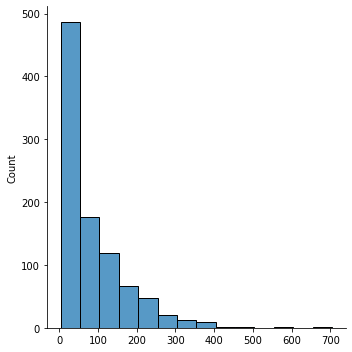

In [ ]:
sns.displot(num_of_movies_reviewed, binwidth = 50)

A  very large percentage of users reviewed under 50 movie, I wonder whether based off of so few reviews how possible it is to make an accurate reccomendation, and this may be something to take into consideration when creating the models

Additionally, it also makes sense to look at the distribution of the reviews to get an understanding of what is considered an average review, what is good and what is bad

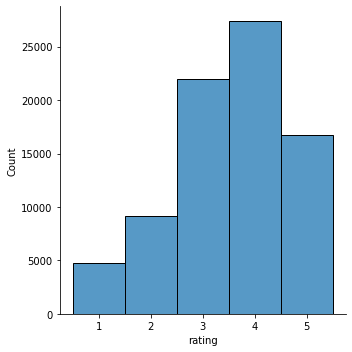

In [ ]:
sns.displot(df['rating'], discrete=True, binwidth=1)

There is clealry not an even distribution among the five options for ratings, rather rating a movie between 3-5 is much more common than 1-2. This may be useful information to know becasue it may make sense based off of this to more heabily weight a 1 or 2 in the negative direction because of how rare they are- indicating that people save a 1 or 2 rating for movies that they really did not like 

#Simple Model Development: 

In this section I am going to go throigh the steps of getting reccomendations for a a user- and based off of this devolopement and the process here, I will be able to show my process and also then be able to have all the tools necessary for building a working reccomender which will be in the next section- Simple Model Final 

User Based Collaborative Filtering: 

*   Pick a user, get the movies the users reviewed
*   Based on this, find the similarities of the users who reviewd some of the same movies
* determines similiarity between them 
* based off of this similarity, determine how much to take into their rating for a prediction for our desired user's rating


Before creating the functional model I would like to manually go through the steps for a specific user to see how to do this, then to generalize to all cases

Let's say we want to find a rating for user 10

In [ ]:
user_ratings = get_user_ratings(10, df)
user_ratings

,userId,movieId,rating,timestamp
673,10,9,4,877889005
674,10,11,4,877888677
675,10,12,5,877886911
676,10,23,5,877886911
677,10,32,4,877886661
...,...,...,...,...
762,10,700,4,877892277
763,10,701,4,877888812
764,10,707,5,877886783
765,10,708,4,877892438


Making a dictionary of this users Movie Ids -> Ratings

In [ ]:
movie_ids = user_ratings['movieId']
ratings = user_ratings['rating']
ratings_dict = dict(zip(movie_ids, ratings))
print(ratings_dict)

{9: 4, 11: 4, 12: 5, 23: 5, 32: 4, 33: 4, 40: 4, 50: 5, 59: 4, 60: 3, 69: 4, 70: 4, 82: 4, 85: 4, 93: 4, 116: 4, 129: 4, 134: 5, 137: 4, 153: 4, 157: 5, 161: 4, 162: 4, 170: 4, 174: 4, 178: 5, 179: 5, 180: 5, 182: 5, 185: 5, 192: 4, 197: 5, 198: 3, 205: 5, 211: 5, 216: 4, 221: 4, 230: 4, 238: 4, 245: 4, 273: 4, 274: 4, 276: 4, 286: 4, 302: 4, 319: 3, 333: 4, 334: 4, 357: 5, 404: 4, 414: 4, 430: 3, 432: 4, 462: 3, 467: 4, 470: 4, 478: 5, 479: 5, 480: 5, 482: 4, 484: 5, 499: 4, 502: 4, 510: 5, 511: 4, 513: 4, 518: 4, 525: 5, 527: 4, 529: 3, 530: 4, 531: 5, 582: 4, 589: 5, 602: 5, 604: 4, 606: 5, 610: 4, 617: 5, 629: 4, 654: 5, 663: 3, 664: 4, 686: 4, 692: 4, 693: 4, 694: 5, 697: 3, 699: 4, 700: 4, 701: 4, 707: 5, 708: 4, 709: 4}


NEED TO FIND SIMILARITY OF USERS: 
* Get rid of reviews that our user did not reviews
* Compared based off of movies that users both reviewed

In [ ]:
list_of_movies = list(movie_ids)
same_movies_watched = df[df['movieId'].isin(list_of_movies)]
same_movies_watched = same_movies_watched[same_movies_watched.userId != 10] #removed our original user #10 
same_movies_watched

,userId,movieId,rating,timestamp
7,1,9,5,878543541
8,1,11,2,875072262
21,1,32,5,888732909
26,1,40,3,876893230
33,1,50,5,874965954
...,...,...,...,...
79897,943,205,5,888639478
79900,943,216,4,888639327
79908,943,230,1,888693158
79915,943,274,3,875502074


Seeing how many unique users there are: 

In [ ]:
len(pd.unique(same_movies_watched['userId']))

921

That means that there are 921 users besides our user (id 10) that watched at least one movie that user 10 watched. And only 20 out of 942 users did not watch at least one same movie

Similiarity of each one: 

In [ ]:
import scipy
from scipy import spatial

Getting score for each user by making a dictionary linking every other user's similarity to the desired user (number 10):

In [ ]:
unique_users = pd.unique(df['userId'])

sim_dict = {}

for x in unique_users: 
  reviews = same_movies_watched[same_movies_watched.userId == x]
  user_same_reviews = user_ratings[user_ratings.movieId.isin(list(reviews['movieId']))]
  user_list = list(user_same_reviews['rating'])
  other_user_list = list(reviews['rating'])
  sim_dict[x] = 1 - spatial.distance.cosine(other_user_list,user_list) # 1 minus because it computes the distance not the similari




/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Making sure we have all the users (should be 943):

In [ ]:
print(len(sim_dict))

943


This sim_dict that was just created has the similarities between every user and user 10

I want to see which other user was rated with the highest similarity and then look at the result to see if it makes sense

In [ ]:
sim_dict
max_key = max(sim_dict, key=sim_dict.get)
print(max_key)

4


I want to take a look to see if makes sense that 9 and 10 are ranked as most similiar: 

In [ ]:
reviews = same_movies_watched[same_movies_watched.userId == 4]
user_same_reviews = user_ratings[user_ratings.movieId.isin(list(reviews['movieId']))]

Looking at the reviews of user 4 and 10: 

In [ ]:
display(reviews)
display(user_same_reviews)


,userId,movieId,rating,timestamp
203,4,11,4,892004520


,userId,movieId,rating,timestamp
674,10,11,4,877888677


See that user 9 and 10 have the same exact reviews for the exact same movies, and this is why they have the highest similarity rating. The issue may be that this can be too small of a sample will size- this may be something to keep in mind that it might make sense to have a minimum amount of shared movies in common

Getting the list of users from most to least similiar: 

In [ ]:
most_sim_users = sorted(sim_dict, key=sim_dict.get, reverse=True)
print(most_sim_users)

[4, 9, 10, 33, 34, 35, 36, 45, 47, 53, 54, 61, 67, 75, 78, 86, 93, 100, 101, 103, 105, 107, 108, 112, 120, 124, 134, 137, 139, 155, 163, 164, 166, 170, 171, 172, 182, 186, 191, 202, 203, 205, 206, 208, 212, 219, 220, 229, 231, 238, 241, 242, 245, 247, 252, 261, 273, 281, 283, 289, 300, 302, 306, 310, 317, 319, 335, 337, 341, 348, 349, 350, 351, 353, 356, 366, 368, 377, 386, 400, 410, 414, 441, 462, 477, 502, 510, 511, 513, 519, 525, 549, 550, 578, 580, 598, 602, 604, 609, 628, 636, 649, 672, 675, 681, 688, 702, 718, 726, 729, 742, 769, 772, 779, 811, 813, 814, 816, 856, 857, 859, 873, 895, 939, 941, 32, 39, 150, 759, 800, 914, 925, 322, 367, 740, 259, 611, 613, 56, 821, 136, 115, 563, 68, 199, 240, 427, 531, 820, 841, 118, 558, 808, 858, 324, 88, 117, 755, 787, 114, 647, 372, 942, 720, 52, 84, 333, 357, 384, 818, 869, 906, 237, 218, 364, 55, 80, 111, 129, 142, 165, 179, 260, 287, 359, 362, 369, 544, 582, 674, 722, 732, 803, 810, 842, 849, 879, 473, 507, 725, 156, 532, 274, 272, 243, 56

So now we have to create a dataframe that has the weighted ratings based off of similarity score:  

In [ ]:
weighted_df = df 


Adding the similarity score for each user as a column to the dataframe: 

In [ ]:
weighted_df['sim_score'] = weighted_df.apply(lambda row: sim_dict.get(row['userId']),axis=1)
weighted_df

,userId,movieId,rating,timestamp,sim_score
0,1,1,5,874965758,0.957431
1,1,2,3,876893171,0.957431
2,1,3,4,878542960,0.957431
3,1,4,3,876893119,0.957431
4,1,5,3,889751712,0.957431
...,...,...,...,...,...
79995,943,1067,2,875501756,0.962527
79996,943,1074,4,888640250,0.962527
79997,943,1188,3,888640250,0.962527
79998,943,1228,3,888640275,0.962527


Checking for Nan values in the sim score. This comes about when the user did not overlap for any movie ratings

In [ ]:
weighted_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
sim_score    0
dtype: int64

Going to fill tha Nan's in with 0. Therefore users who were not able to be computed for a sim score just wont have an effect on the calcualtion

In [ ]:
weighted_df = weighted_df.fillna(0)

In [ ]:
weighted_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
sim_score    0
dtype: int64

No more nans!

Now need to add a weighted movie review for each movie review. Do this by multiplyind the similarity score of the user by the rating given for the movie: 

In [ ]:
def get_user_weighted_ratings(row):
  #if row['sim_score']
  return (row['rating']*row['sim_score'])

In [ ]:
weighted_df['weighted_review'] = weighted_df.apply(lambda row:get_user_weighted_ratings(row),axis=1)
weighted_df

,userId,movieId,rating,timestamp,sim_score,weighted_review
0,1,1,5,874965758,0.957431,4.787153
1,1,2,3,876893171,0.957431,2.872292
2,1,3,4,878542960,0.957431,3.829722
3,1,4,3,876893119,0.957431,2.872292
4,1,5,3,889751712,0.957431,2.872292
...,...,...,...,...,...,...
79995,943,1067,2,875501756,0.962527,1.925054
79996,943,1074,4,888640250,0.962527,3.850108
79997,943,1188,3,888640250,0.962527,2.887581
79998,943,1228,3,888640275,0.962527,2.887581


Checking Nan's

In [ ]:
weighted_df.isna().sum()

userId             0
movieId            0
rating             0
timestamp          0
sim_score          0
weighted_review    0
dtype: int64

good- there are nonw

Now need to get overall weighted ratings for each movie. This can be done by getting the sum of the weighted ratings and dividing by the sum of the similarity scores for the users: 

just getting the dataframe orderd by movies and dropping columns we don't need so it is easier to work with

In [ ]:
weighted_df = weighted_df.sort_values('movieId').drop(columns=['userId', 'timestamp', 'rating'])
weighted_df

,movieId,sim_score,weighted_review
0,1,0.957431,4.787153
44200,1,0.943694,4.718468
44164,1,0.978499,3.913997
43909,1,0.985714,3.942854
75923,1,0.962686,2.888059
...,...,...,...
71100,1678,0.984670,0.984670
71101,1679,0.984670,2.954009
71102,1680,0.984670,1.969340
75707,1681,0.957933,2.873799


In [ ]:
group_by_movie = weighted_df.groupby(['movieId'])
groups =  group_by_movie.__iter__()


prediction_df = pd.DataFrame(columns = ['movieId', 'summedSim', 'summedWeightedRating'])

for movie in groups: 
  single_movie_df = movie[1]
  movieId = single_movie_df.iat[0,0]
  summedSim = single_movie_df['sim_score'].sum()
  summedWeights = single_movie_df['weighted_review'].sum()
  new_row = {'movieId':movieId, 'summedSim' : summedSim, 'summedWeightedRating': summedWeights }

  prediction_df = prediction_df.append(new_row, ignore_index = True)


prediction_df



,movieId,summedSim,summedWeightedRating
0,1.0,371.607507,1447.370046
1,2.0,101.499053,323.669904
2,3.0,72.923826,218.892544
3,4.0,165.617800,585.200746
4,5.0,66.935228,221.091083
...,...,...,...
1645,1678.0,0.984670,0.984670
1646,1679.0,0.984670,2.954009
1647,1680.0,0.984670,1.969340
1648,1681.0,0.957933,2.873799


Getting the predicted rating by dividing the summed weighted rating by the similarity scores

In [ ]:
prediction_df['predictedRating'] = prediction_df.apply(lambda row: (row['summedWeightedRating']/row['summedSim']),axis=1)
prediction_df

,movieId,summedSim,summedWeightedRating,predictedRating
0,1.0,371.607507,1447.370046,3.894889
1,2.0,101.499053,323.669904,3.188896
2,3.0,72.923826,218.892544,3.001660
3,4.0,165.617800,585.200746,3.533441
4,5.0,66.935228,221.091083,3.303060
...,...,...,...,...
1645,1678.0,0.984670,0.984670,1.000000
1646,1679.0,0.984670,2.954009,3.000000
1647,1680.0,0.984670,1.969340,2.000000
1648,1681.0,0.957933,2.873799,3.000000


Going to gill all Nan's with the overall average for movies (which I believe should minimize the rmse)

In [ ]:
prediction_df['predictedRating'] = prediction_df['predictedRating'].fillna(3.5)

Comparing the actual to predicted reviews (this works because the reviews are already in numeric order of movieId). This can onky be down by looking at movies the user actually reviews: 

In [ ]:
user_reviews =get_user_ratings(10, df)
actual_reviews = list(user_reviews['rating'])
pred_movies_user_watched = prediction_df[prediction_df['movieId'].isin(list(user_reviews['movieId']))]
pred_reviews = list(pred_movies_user_watched['predictedRating'])

Checkinig the RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(actual_reviews, pred_reviews, squared=False)
rmse

0.6648861084234627

A pretty good RMSE

And if we would want to reccomend anything to this user we would just sort the ratings from highest to lowest and reccomend the top 10

In [ ]:
sorted_predictions = prediction_df.sort_values(by=['predictedRating'] , ascending =False)
sorted_predictions.head(10)

,movieId,summedSim,summedWeightedRating,predictedRating
1479,1500.0,0.957866,4.789329,5.000000
1449,1467.0,1.932378,9.661892,5.000000
1566,1599.0,0.949041,4.745205,5.000000
1284,1293.0,2.960747,14.803737,5.000000
1620,1653.0,1.000000,5.000000,5.000000
1193,1201.0,0.977403,4.887015,5.000000
1115,1122.0,0.986570,4.932848,5.000000
1181,1189.0,1.964790,9.823948,5.000000
1433,1449.0,6.788477,32.019431,4.716732
1352,1367.0,2.876752,13.424791,4.666649


#Simple Model Final Product: 

Based off the development above, I created model function that can be given a user and a dataframe of ratings and will predict what the user will rate all the movies in the dataframe. This code is just copied and pasted snippets from the section above:

In [ ]:
def predict_reviews_scores_for_all_movies_single_user(userId, dataframe): 
  user_ratings = get_user_ratings(userId, dataframe)
  movie_ids = user_ratings['movieId']
  ratings = user_ratings['rating']
  ratings_dict = dict(zip(movie_ids, ratings))

  list_of_movies = list(movie_ids)
  same_movies_watched = dataframe[dataframe['movieId'].isin(list_of_movies)]
  same_movies_watched = same_movies_watched[same_movies_watched.userId != userId] #removed our original user #10 

  unique_users = pd.unique(same_movies_watched['userId'])

  sim_dict = {}
  for x in unique_users: 
    reviews = same_movies_watched[same_movies_watched.userId == x]
    user_same_reviews = user_ratings[user_ratings.movieId.isin(list(reviews['movieId']))]
    user_list = list(user_same_reviews['rating'])
    other_list = list(reviews['rating'])
    sim_dict[x] =  1 - spatial.distance.cosine(other_list,user_list)

  weighted_df = dataframe
 # weighted_df = weighted_df[weighted_df['userId'].isin(sim_dict.keys())]
  sim_scores= weighted_df.apply(lambda row: sim_dict.get(row['userId']),axis=1)
  weighted_df = weighted_df.assign(sim_score = sim_scores) 
  weighted_df = weighted_df.fillna(0)
  weighted_reviews = weighted_df.apply(lambda row:get_user_weighted_ratings(row),axis=1)
  weighted_df = weighted_df.assign(weighted_review = weighted_reviews) 

  
  weighted_df = weighted_df.sort_values('movieId').drop(columns=['userId', 'timestamp', 'rating'])




  group_by_movie = weighted_df.groupby(['movieId'])
  groups =  group_by_movie.__iter__()

  #display(weighted_df)
  prediction_df = pd.DataFrame(columns = ['movieId', 'summedSim', 'summedWeightedRating'])

  for movie in groups: 
    single_movie_df = movie[1]
    movieId = single_movie_df.iat[0,0]
    summedSim = max(1,single_movie_df['sim_score'].sum())
    summedWeights = max(1,single_movie_df['weighted_review'].sum())
    new_row = {'movieId':movieId, 'summedSim' : summedSim, 'summedWeightedRating': summedWeights }

    prediction_df = prediction_df.append(new_row, ignore_index = True)

  prediction_df['predictedRating'] = prediction_df.apply(lambda row: (row['summedWeightedRating']/row['summedSim']),axis=1)
  return prediction_df.drop(columns= ['summedSim', 'summedWeightedRating'])


  

Train and predict based off of the training set: 

In [ ]:
predicted = predict_reviews_scores_for_all_movies_single_user(12, df_train)

In [ ]:
predicted

,movieId,predictedRating
0,1.0,3.882630
1,2.0,3.097250
2,3.0,3.001296
3,4.0,3.515144
4,5.0,3.369536
...,...,...
1619,1676.0,1.934139
1620,1677.0,2.848837
1621,1678.0,1.000000
1622,1679.0,3.000000


Getting rmse for individual user. Using the daataframe passed we can get the actual ratings the user gave (Y values) and compare that to what the model predicted for this user: 

In [ ]:
def get_rmse(userId, predicted, dataframe): 
  user_df =get_user_ratings(userId, dataframe)
  actual_reviews = list(user_df['rating'])
  pred_movies_user_watched = predicted[predicted['movieId'].isin(list(user_df['movieId']))]
  pred_reviews = list(pred_movies_user_watched['predictedRating'])

  return mean_squared_error(actual_reviews, pred_reviews, squared=False)



In [ ]:
rmse = get_rmse(12, predicted, df_train)
print(rmse)

0.9843143896461946


Now getting the RMSE on the validation set: 

In [ ]:
print(get_rmse(12, predicted, df_val))

0.7293766124555179


Even lower in this case! Amazing that is so low

I thik we see from the drastic change in rmse from the training to test set for one user is that looking at individual user is not indicative of how the model works for the whole population becasue for each instance the results could theoretically be drastically different, so I created this function to get the average rmse score for n predictions which can help estimate the rmse of the model for the whole dataset

In [ ]:
import random
def rmse_score_n_users(n, training_dataframe, val_dataframe): 
  rmse_train = 0
  rmse_val = 0
  users = random.sample(range(1, 944), n)
  for user in users: 
    predictions_train = predict_reviews_scores_for_all_movies_single_user(user, training_dataframe)
    rmse_train = rmse_train + get_rmse(user, predictions_train, training_dataframe)
    predictions_val =  predict_reviews_scores_for_all_movies_single_user(user, val_dataframe) 
    rmse_val = rmse_val + get_rmse(user,predictions_val,val_dataframe )
  return ((rmse_train/n), (rmse_val/n))

   


In this example we are going to be randomly selecting 25 users and then getting the average rmse of both the training set and validation for all of them

In [ ]:
rmse_n = rmse_score_n_users(25, df_train, df_val)


Printing the two rmse  scores for both the train and validation sets of 25 randomly chosen users:

In [ ]:
train_score = rmse_n[0]
val_score = rmse_n[1]
print("Training rmse: " ,train_score)
print("Validation rmse: " ,val_score)

Training rmse:  1.0937214685574994
Validation rmse:  1.0621523711954743


Pretty solid RMSE

I thouhgt I should add a feature to get the top n movie reccomendations for a specific user

In [ ]:
def reccomend_top_n_movies(user_id, dataframe, n): 
  all_reviews = predict_reviews_scores_for_all_movies_single_user(user_id, dataframe)
  sorted = all_reviews.sort_values(by=['predictedRating'], ascending = False)
  return sorted.head(n)


In [ ]:
top_ten = reccomend_top_n_movies(99, df_train, 15)
top_ten

,movieId,predictedRating
1178,1189.0,5.000000
1346,1367.0,5.000000
1280,1293.0,5.000000
1135,1144.0,5.000000
1469,1500.0,4.970674
1555,1607.0,4.929482
1441,1467.0,4.784132
1190,1201.0,4.765364
1548,1599.0,4.699136
860,867.0,4.665362


#Hybrid Model: 

The structure of this model is going to be a classic sequential model that takes as input the simlarity scores  of each user to every other user (that used for the collabarative filtering) and then as many content based features that can be helpful


Going to need to make a dataframe where each row is information about the user: 

First I am going to make a matrix where each user has a row of their movie reviews: 

In [ ]:
movies = pd.unique(df['movieId'])
users = pd.unique(df['userId'])
movies = np.sort(movies)
movies_df = pd.DataFrame(columns = movies, index = users)
movies_df

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filling in the dataframe using training data, filling in what each user rated each movie:

In [ ]:
#row[1][0] = userId
#row[1][1] = movieId
#row[1][2] = rating
for row in df_train.iterrows():
  user = int(row[1][0])
  movie = int(row[1][1])
  movies_df.loc[user, movie] = int(row[1][2])

movies_df

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5,3,4,3,3,NaN,4,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2,NaN,NaN,4,5,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filling the Nan's- the movies the user did not review- with 0's

In [ ]:
movies_df = movies_df.fillna(0)
movies_df

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5,3,4,3,3,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,2,0,0,4,5,3,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So now we have a sparse matrix of user->ratings for movie

Creating a martrix of each users simlarity to another user: 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(movies_df)
sim_df = pd.DataFrame(sim_matrix)
sim_df

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1.000000,0.093445,0.054711,0.013066,0.170363,0.274463,0.149260,0.068260,0.070603,0.174923,...,0.197578,0.057225,0.187774,0.112604,0.117652,0.031843,0.169033,0.087879,0.073227,0.213090
1,0.093445,1.000000,0.064945,0.107955,0.020004,0.164248,0.053399,0.030332,0.052033,0.064822,...,0.037004,0.087679,0.240510,0.292399,0.193700,0.097936,0.168085,0.093170,0.122485,0.037303
2,0.054711,0.064945,1.000000,0.175534,0.045175,0.093035,0.000000,0.106173,0.000000,0.037160,...,0.033427,0.044206,0.104587,0.066033,0.073335,0.018625,0.128231,0.110464,0.080306,0.024507
3,0.013066,0.107955,0.175534,1.000000,0.000000,0.000000,0.014872,0.057257,0.000000,0.028238,...,0.017463,0.000000,0.099775,0.125444,0.096788,0.048650,0.119984,0.181371,0.134252,0.044810
4,0.170363,0.020004,0.045175,0.000000,1.000000,0.166880,0.114538,0.129580,0.062208,0.091567,...,0.268982,0.065528,0.082170,0.033898,0.125325,0.074936,0.169680,0.155946,0.117905,0.206718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.031843,0.097936,0.018625,0.048650,0.074936,0.089186,0.066276,0.049835,0.000000,0.019662,...,0.066472,0.369857,0.223199,0.204393,0.405487,1.000000,0.111394,0.176806,0.032199,0.122132
939,0.169033,0.168085,0.128231,0.119984,0.169680,0.224321,0.224180,0.047524,0.075903,0.189925,...,0.219250,0.072709,0.171160,0.180954,0.180985,0.111394,1.000000,0.137799,0.223715,0.231587
940,0.087879,0.093170,0.110464,0.181371,0.155946,0.091760,0.004680,0.081071,0.069538,0.000000,...,0.049453,0.076300,0.228731,0.153938,0.260767,0.176806,0.137799,1.000000,0.063364,0.078555
941,0.073227,0.122485,0.080306,0.134252,0.117905,0.153007,0.109544,0.000000,0.049149,0.175585,...,0.137947,0.062865,0.085207,0.129893,0.097293,0.032199,0.223715,0.063364,1.000000,0.163321


To get more context for the hybrid model, it is going to be valuable to get information about the users, which we can do from the u.user data provided by movielens (and one hot encoding it so it can be used in a neural net) 

In [ ]:
user_data = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u.user", sep= '|', header = None, names = ["userId", "age", "gender", "ocupation", "zip code"])
user_data = user_data.drop(['zip code'], axis = 1)
user_data = pd.get_dummies(user_data)
user_data

,userId,age,gender_F,gender_M,ocupation_administrator,ocupation_artist,ocupation_doctor,ocupation_educator,ocupation_engineer,ocupation_entertainment,...,ocupation_marketing,ocupation_none,ocupation_other,ocupation_programmer,ocupation_retired,ocupation_salesman,ocupation_scientist,ocupation_student,ocupation_technician,ocupation_writer
0,1,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,26,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
939,940,32,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,941,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
941,942,48,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Combining the two dataframes

In [ ]:
user_data = pd.concat([user_data, sim_df], axis = 1)
user_data

,userId,age,gender_F,gender_M,ocupation_administrator,ocupation_artist,ocupation_doctor,ocupation_educator,ocupation_engineer,ocupation_entertainment,...,933,934,935,936,937,938,939,940,941,942
0,1,24,0,1,0,0,0,0,0,0,...,0.197578,0.057225,0.187774,0.112604,0.117652,0.031843,0.169033,0.087879,0.073227,0.213090
1,2,53,1,0,0,0,0,0,0,0,...,0.037004,0.087679,0.240510,0.292399,0.193700,0.097936,0.168085,0.093170,0.122485,0.037303
2,3,23,0,1,0,0,0,0,0,0,...,0.033427,0.044206,0.104587,0.066033,0.073335,0.018625,0.128231,0.110464,0.080306,0.024507
3,4,24,0,1,0,0,0,0,0,0,...,0.017463,0.000000,0.099775,0.125444,0.096788,0.048650,0.119984,0.181371,0.134252,0.044810
4,5,33,1,0,0,0,0,0,0,0,...,0.268982,0.065528,0.082170,0.033898,0.125325,0.074936,0.169680,0.155946,0.117905,0.206718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,26,1,0,0,0,0,0,0,0,...,0.066472,0.369857,0.223199,0.204393,0.405487,1.000000,0.111394,0.176806,0.032199,0.122132
939,940,32,0,1,1,0,0,0,0,0,...,0.219250,0.072709,0.171160,0.180954,0.180985,0.111394,1.000000,0.137799,0.223715,0.231587
940,941,20,0,1,0,0,0,0,0,0,...,0.049453,0.076300,0.228731,0.153938,0.260767,0.176806,0.137799,1.000000,0.063364,0.078555
941,942,48,1,0,0,0,0,0,0,0,...,0.137947,0.062865,0.085207,0.129893,0.097293,0.032199,0.223715,0.063364,1.000000,0.163321


Now we have for each user a lot of information that we can put into a neural net

Making the X and Y values that can put into a model 

In [ ]:
train_sorted = df_train.sort_values(by = ['userId'])
y_train = train_sorted['rating']
train_sorted

,userId,movieId,rating,timestamp
104,1,198,5,878542717
67,1,127,5,874965706
43,1,75,4,878543238
15,1,22,4,875072404
121,1,244,2,887431973
...,...,...,...,...
79865,943,97,2,888639445
79832,943,2,5,888639953
79882,943,181,4,875409978
79886,943,186,5,888639478


It will be even more helpful to add context about the movies themselves. This next code block will be loading information about the movies from u.item:

In [ ]:
df_info = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u.item", sep= '|', header = None, names = ["movie id",  "movie title" , "release date" , "video release date" ,
              "IMDb URL" ,  "unknown" , "Action",  "Adventure", "Animation", "Children's",  "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" , "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,
              "Thriller" , "War" , "Western"], encoding ='latin-1') #https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

Taking a look at what is provided here: 

In [ ]:
df_info.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


See that for each movie id it provides basic info like the title, release date, the link to IMDb, and which genres the movie belongs to (can be more than one). We can add the genre information to the input

In [ ]:
#getting rid of columns we don't need. Removed movieId bc it is just the index+1 
df_info = df_info.drop(columns=['movie title', 'release date', 'video release date','IMDb URL', 'movie id'])
df_info

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Making the x_train inout by combining the data about the user and data about the movie for each review given

In [ ]:
x_train = list()
for userId in train_sorted['userId']:
  #df.loc[df['col1'] == value]
  #row = pd.concat([user_data.loc[user_data['userId']==userId], pd.DataFrame(np.array(df_info.iloc[userId-1]], index = user_data.index, columns = ["unknown" , "Action",  "Adventure", "Animation", "Children's",  "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" , "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,"Thriller" , "War" , "Western"]), axis = 1)
  row =user_data.loc[user_data['userId']==userId]
  genre_data = df_info.iloc[userId-1]
  row = row.assign(unknown=genre_data['unknown'], Action = genre_data['Action'],Adventure=genre_data['Adventure'], 
                   Animation = genre_data['Animation'], Childrens=genre_data['Children\'s'],
                   Comedy = genre_data['Comedy'],Crime=genre_data['Crime'],
                   Documentary = genre_data['Documentary'], Drama=genre_data['Drama'], 
                   Fantasy = genre_data['Fantasy'], FilmNoir=genre_data['Film-Noir'], Horror = genre_data['Horror'], 
                   Musical = genre_data['Musical'], Mystery=genre_data['Mystery'], Romance = genre_data['Romance'], 
                   SciFi = genre_data['Sci-Fi'], Thriller=genre_data['Thriller'], War = genre_data['War'], Western = genre_data["Western"])
   
            #[["unknown" , "Action",  "Adventure", "Animation", "Children's", 
             # "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" , "Film-Noir" , "Horror" , 
            # "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,"Thriller" , "War" , "Western"]] = genre_data



  x_train.append(row)

x_train = np.array(x_train)

Inputting all of this into a sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

model_new = Sequential()
model_new.add(Dense(128, input_shape= (1, 987), activation='relu', name='fc1')) 
model_new.add(Dense(128, activation='relu', name='fc2'))
model_new.add(Dropout(0.2))
model_new.add(Dense(64, activation='relu', name='fc4'))
model_new.add(Dropout(0.2))
model_new.add(Dense(32, activation='relu', name='fc3'))
model_new.add(Dropout(0.2))
model_new.add(Dense(1, name='output')) 
optimizer = Adam(learning_rate =0.001)
model_new.compile(optimizer, loss='mean_squared_error', metrics=['RootMeanSquaredError'])

Played around a little to get this configuration. Not too different from other models we have created, excpet that the loss is defined by the mean_squared_error here. Could have longer with the epochs, but improvement was't that much better even over a hundred so I kept it at 50

In [ ]:
history = model_new.fit(x_train, y_train, verbose=1, epochs=150)

Epoch 1/50
2000/2000 [==============================] - 8s 3ms/step - loss: 2.3013 - root_mean_squared_error: 1.5170
Epoch 2/50
2000/2000 [==============================] - 5s 2ms/step - loss: 1.3937 - root_mean_squared_error: 1.1806
Epoch 3/50
2000/2000 [==============================] - 5s 3ms/step - loss: 1.3405 - root_mean_squared_error: 1.1578
Epoch 4/50
2000/2000 [==============================] - 5s 2ms/step - loss: 1.3138 - root_mean_squared_error: 1.1462
Epoch 5/50
2000/2000 [==============================] - 5s 3ms/step - loss: 1.2873 - root_mean_squared_error: 1.1346
Epoch 6/50
2000/2000 [==============================] - 5s 2ms/step - loss: 1.2727 - root_mean_squared_error: 1.1281
Epoch 7/50
2000/2000 [==============================] - 5s 2ms/step - loss: 1.2622 - root_mean_squared_error: 1.1235
Epoch 8/50
2000/2000 [==============================] - 5s 3ms/step - loss: 1.2520 - root_mean_squared_error: 1.1189
Epoch 9/50
2000/2000 [==============================] - 5s 2ms/s

1.1258 rmse is pretty good